In [1]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/data.csv')

In [5]:
data=pd.read_csv('/content/drive/MyDrive/data.csv')

In [6]:
dataset.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


In [7]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [8]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

In [9]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d/%m/%Y %H:%M:%S')

In [10]:
data['timestamp']

0      2018-02-28 21:00:00
1      2018-02-28 21:15:00
2      2018-02-28 10:15:00
3      2018-02-28 10:15:00
4      2018-02-28 10:30:00
               ...        
2085   2018-07-03 03:50:00
2086   2018-07-03 21:10:00
2087   2018-07-03 12:10:00
2088   2018-07-03 10:35:00
2089   2018-07-03 23:45:00
Name: timestamp, Length: 2090, dtype: datetime64[ns]

In [11]:
# DATE TIME STAMP FUNCTION
column_1 = data.iloc[:,0]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

<ipython-input-11-40e3770bca70>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "week": column_1.dt.week,
<ipython-input-11-40e3770bca70>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "weekofyear": column_1.dt.weekofyear,


In [12]:
dataset1=dataset.drop('timestamp',axis=1)

In [13]:
data1=pd.concat([db,dataset1],axis=1)

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2068 non-null   float64
 1   month       2068 non-null   float64
 2   day         2068 non-null   float64
 3   hour        2068 non-null   float64
 4   dayofyear   2068 non-null   float64
 5   week        2068 non-null   float64
 6   weekofyear  2068 non-null   float64
 7   dayofweek   2068 non-null   float64
 8   weekday     2068 non-null   float64
 9   quarter     2068 non-null   float64
 10  act379      2090 non-null   int64  
 11  act13       2090 non-null   int64  
 12  act279      2090 non-null   int64  
 13  act323      2090 non-null   int64  
 14  act363      2090 non-null   int64  
 15  act302      2090 non-null   int64  
 16  latitude    2090 non-null   float64
 17  longitude   2090 non-null   float64
dtypes: float64(12), int64(6)
memory usage: 294.0 KB


In [15]:
data1.dropna(inplace=True)

In [16]:
data1 = data1.reset_index(drop=True)

In [17]:
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.737260,75.875987
1,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
4,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772


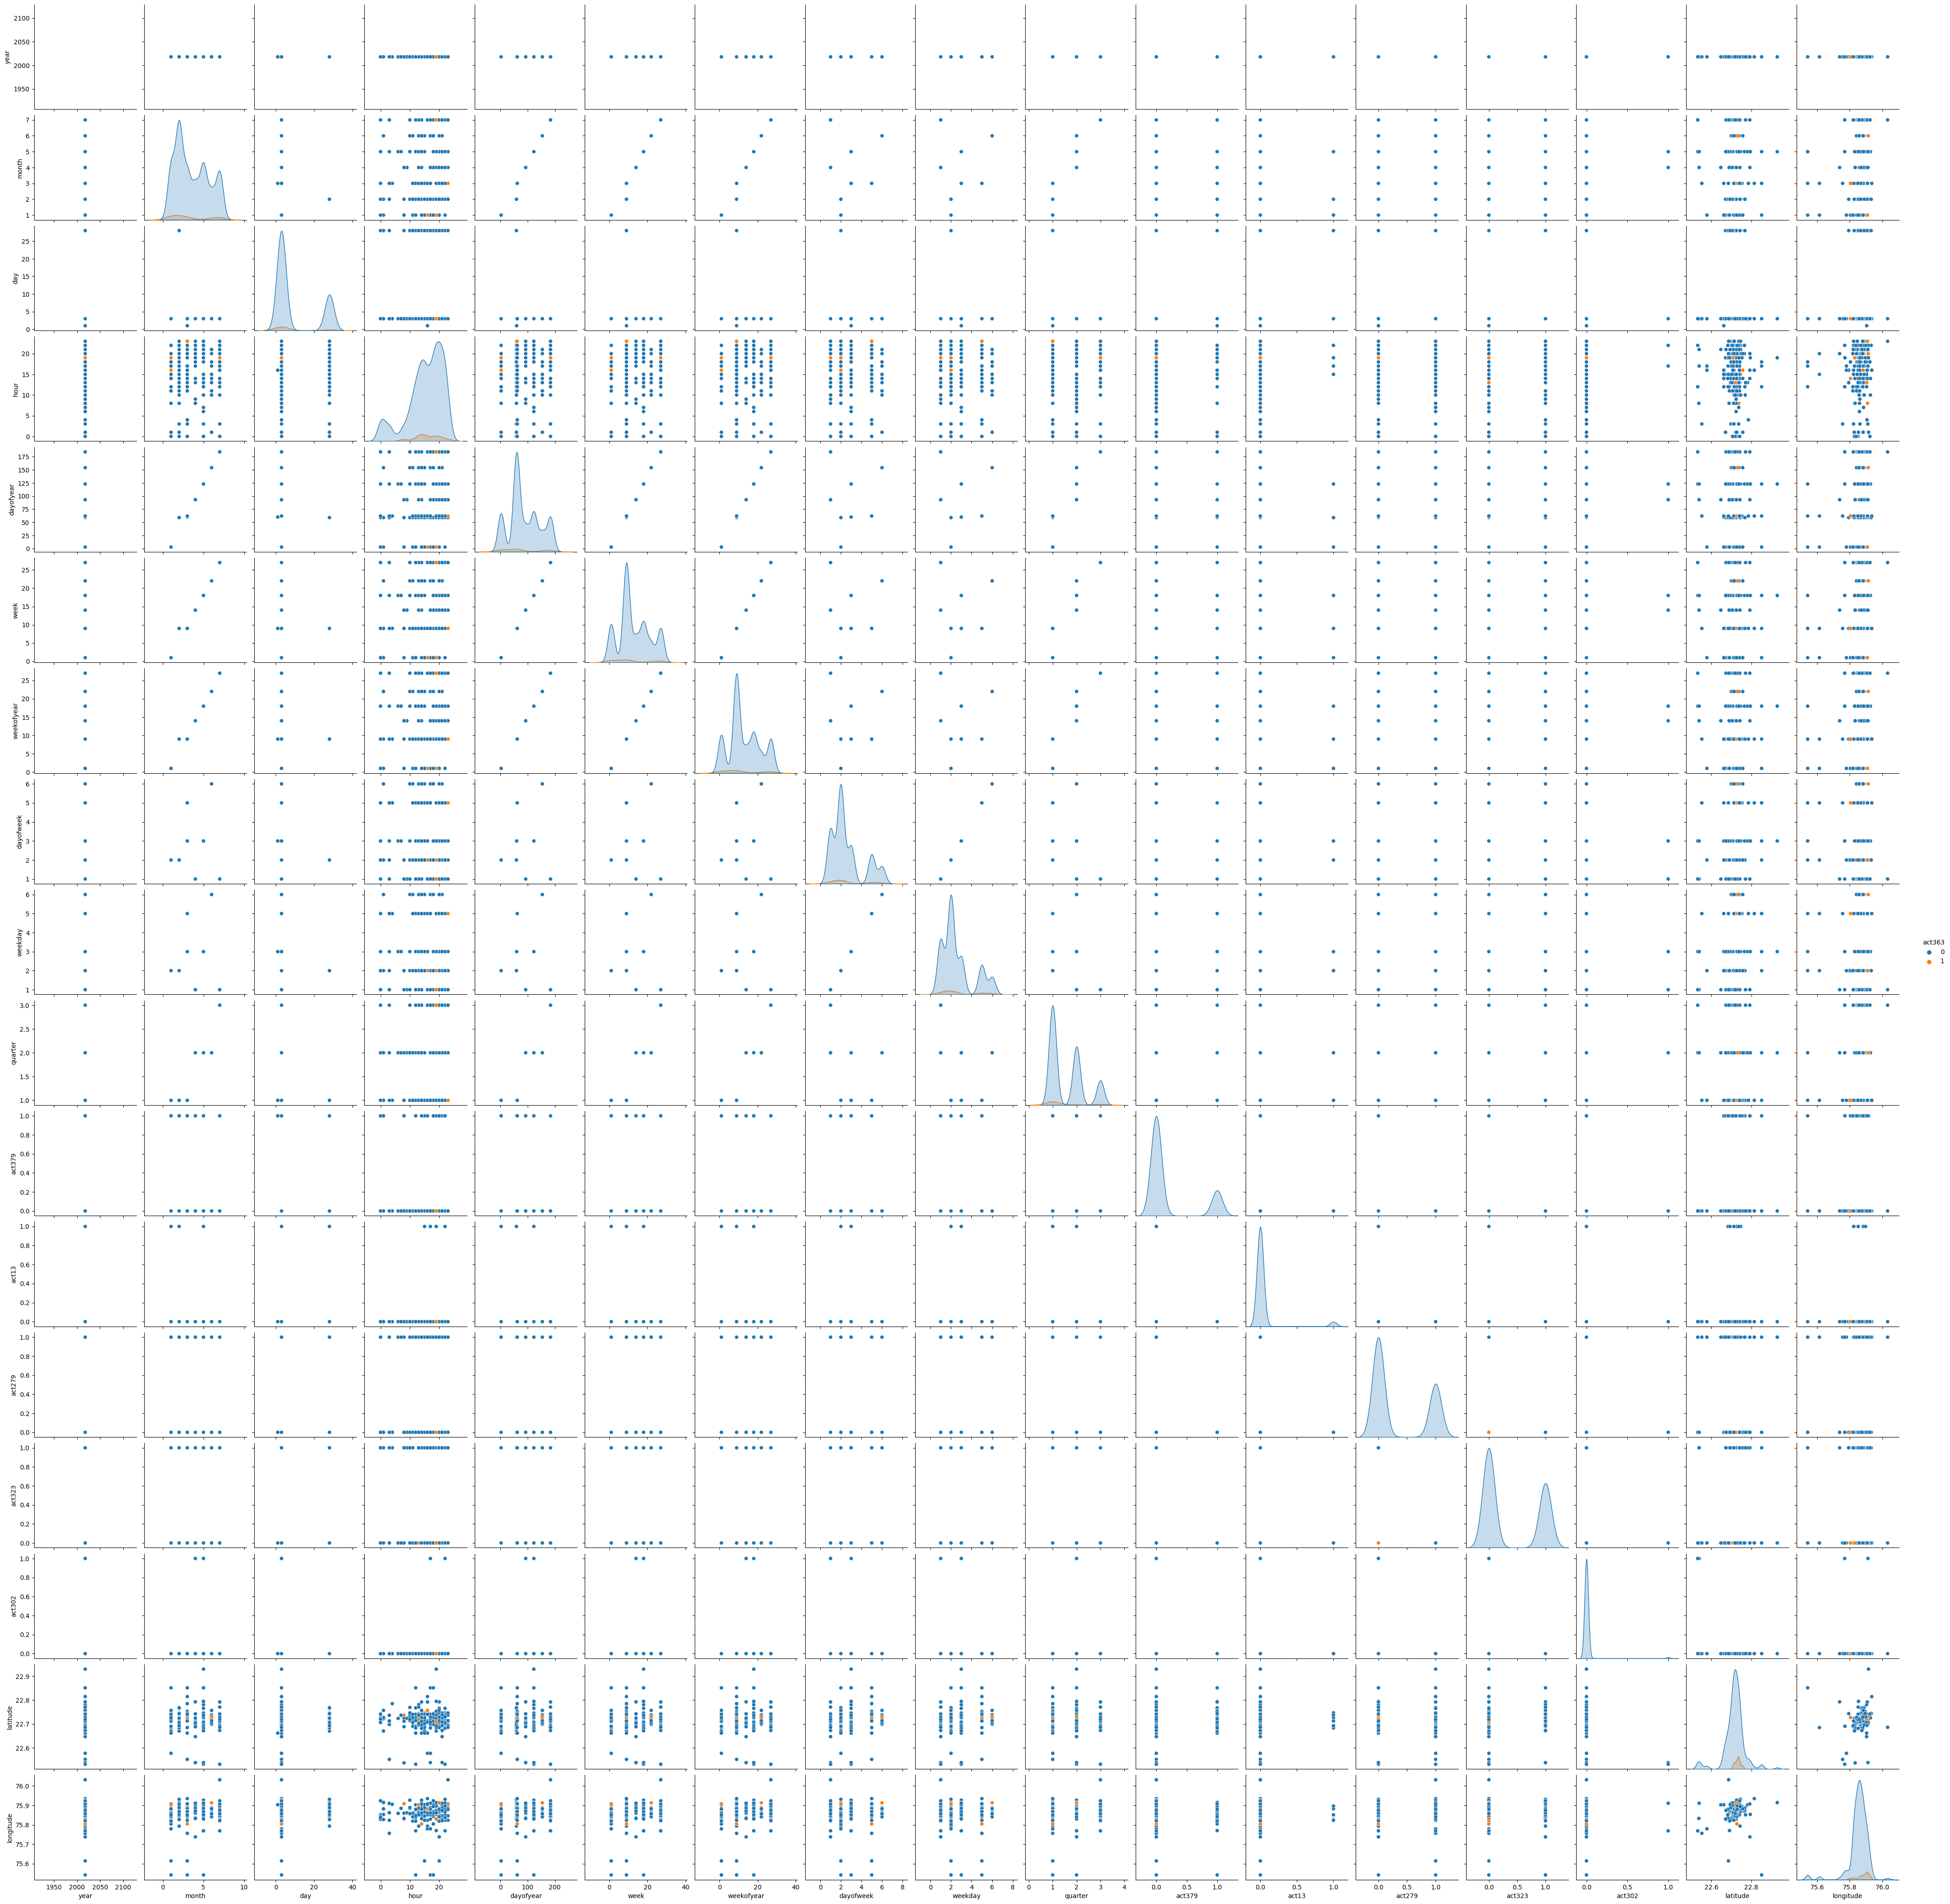

In [18]:
#Data Visualization & Analysis
sns.pairplot(data1,hue='act363')

<Axes: xlabel='act379', ylabel='hour'>

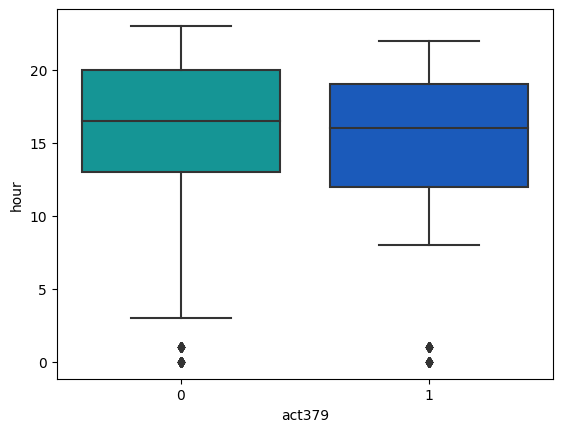

In [19]:
sns.boxplot(x='act379' ,y='hour' ,data=data1, palette='winter_r')

<Axes: xlabel='act13', ylabel='hour'>

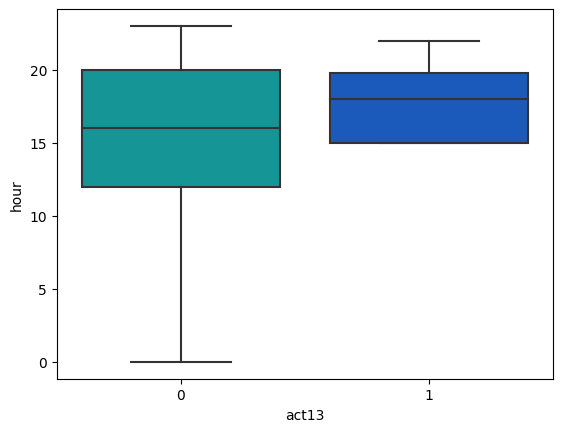

In [20]:
sns.boxplot(x='act13' ,y='hour' ,data=data1 , palette='winter_r')

<Axes: xlabel='act323', ylabel='hour'>

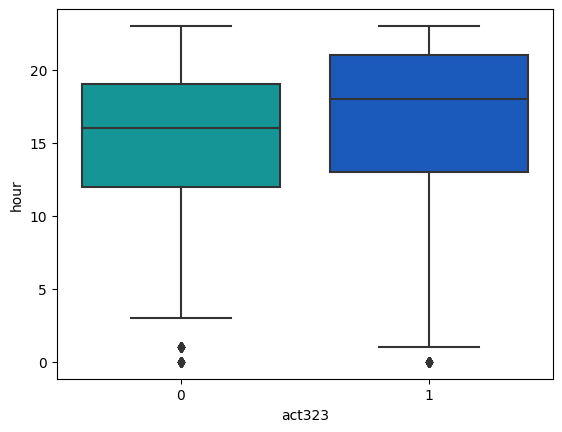

In [21]:
sns.boxplot(x='act323' ,y='hour' ,data=data1, palette='winter_r')

<Axes: xlabel='act363', ylabel='hour'>

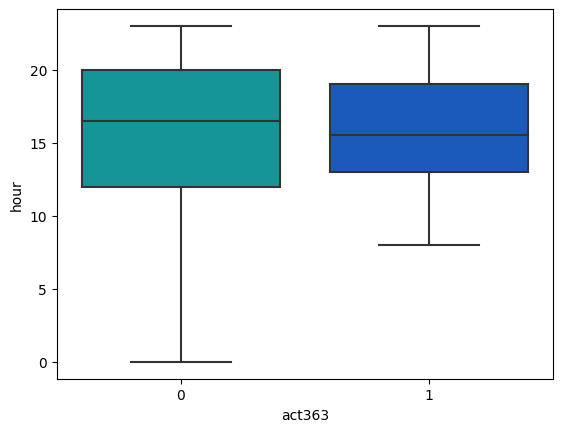

In [22]:
sns.boxplot(x='act363' ,y='hour' ,data=data1, palette='winter_r')

In [23]:
df = pd.DataFrame(data=data1, columns=['act13', 'hour', 'day'])

<Axes: xlabel='act13', ylabel='hour'>

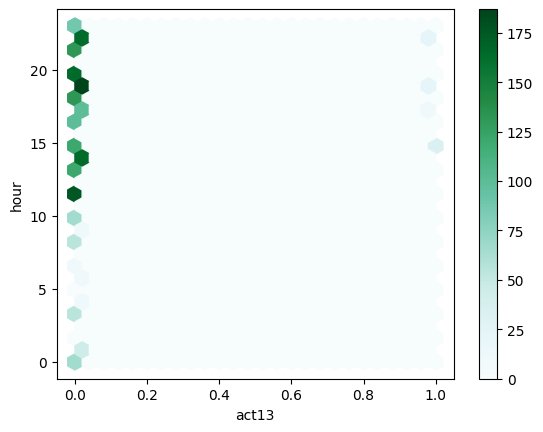

In [24]:
df.plot.hexbin(x='act13',y='hour',gridsize=25)

<Axes: >

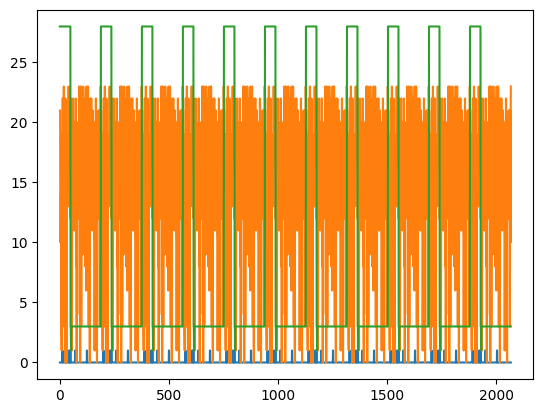

In [25]:
df.plot(legend=False)

In [26]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])

<Axes: ylabel='Density'>

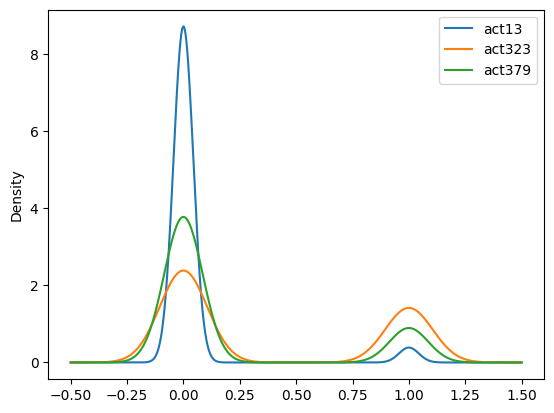

In [27]:
df1.plot.kde()

In [28]:
X=data1.iloc[:,[1,2,3,4,6,16,17]].values

In [29]:
X

array([[ 2.      , 28.      , 21.      , ...,  9.      , 22.73726 ,
        75.875987],
       [ 2.      , 28.      , 21.      , ...,  9.      , 22.720992,
        75.876083],
       [ 2.      , 28.      , 10.      , ...,  9.      , 22.736676,
        75.883168],
       ...,
       [ 7.      ,  3.      , 12.      , ..., 27.      , 22.531931,
        75.769126],
       [ 7.      ,  3.      , 10.      , ..., 27.      , 22.719569,
        75.857726],
       [ 7.      ,  3.      , 23.      , ..., 27.      , 22.686437,
        76.032055]])

In [30]:
y=data1.iloc[:,[10,11,12,13,14,15]].values

In [31]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [32]:
# Splitting the data
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [34]:
#Creating & Training KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
knn.score(X_test,y_test)

0.9371980676328503

In [36]:
knn.score(X_train,y_train)

0.9824667472793228

In [37]:
#Elbow Method For optimum value of K
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

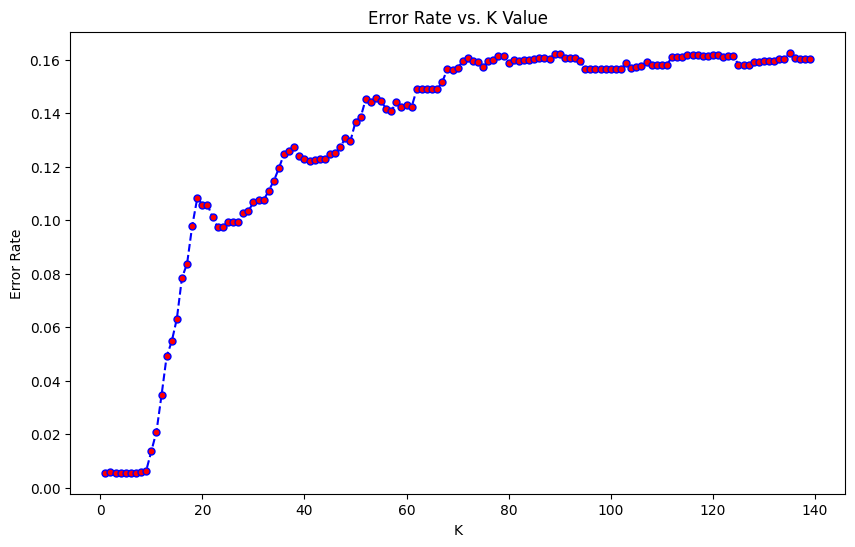

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
#Creating & Training Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [41]:
y_pred=dtree.predict(X_test)

In [42]:
dtree.score(X_test,y_test)

0.9806763285024155

In [43]:
dtree.score(X_train,y_train)

0.9915356711003628

In [44]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [45]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)

In [46]:
treefeatures

array([0.00934881, 0.03958678, 0.3138252 , 0.09146966, 0.0174176 ,
       0.26411523, 0.26423671])

In [47]:
features = data1.iloc[:,[1,2,3,4,6,16,17]].values

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, 'Relative Importance')

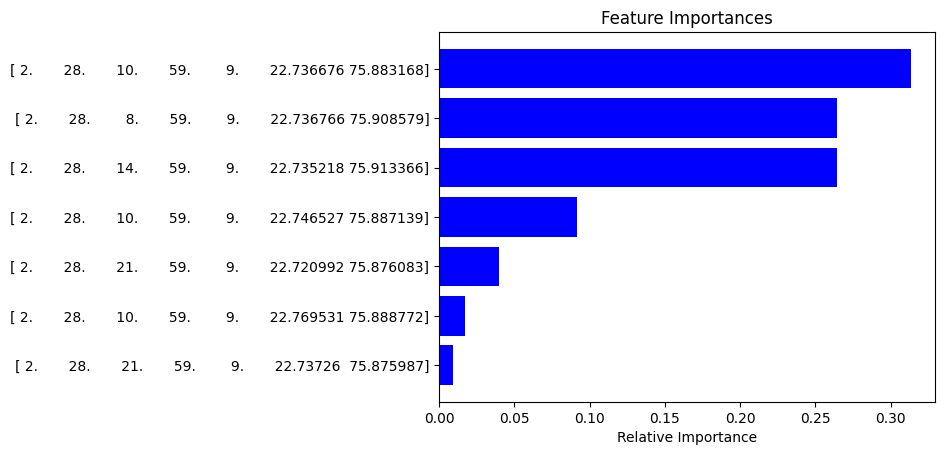

In [48]:
plt.figure(2)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [49]:
#Tree Visualization
feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']

In [50]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred=rfc.predict(X_test)

In [53]:
rfc.score(X_test,y_test)

0.9806763285024155

In [54]:
rfc.score(X_train,y_train)

0.9915356711003628

In [55]:
om=rfc.feature_importances_
indices = np.argsort(om)

In [56]:
om

array([0.03662535, 0.01870292, 0.3111269 , 0.04271163, 0.03298644,
       0.28883475, 0.26901201])

In [57]:
features = data1.columns

Text(0.5, 0, 'Relative Importance')

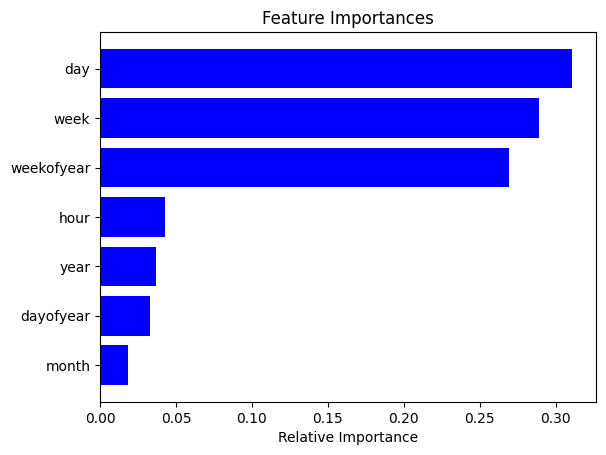

In [58]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [59]:
# XGBoost
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)

In [61]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)


In [63]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

In [64]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [65]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

In [67]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")
# RMSE of the base model: 543.203

RMSE of the base model: 0.029


In [68]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 100

In [70]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [71]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
)

[0]	train-rmse:0.38768	validation-rmse:0.39033
[1]	train-rmse:0.30840	validation-rmse:0.31310
[2]	train-rmse:0.25256	validation-rmse:0.25831
[3]	train-rmse:0.20977	validation-rmse:0.21712
[4]	train-rmse:0.18863	validation-rmse:0.19639
[5]	train-rmse:0.16672	validation-rmse:0.17504
[6]	train-rmse:0.15147	validation-rmse:0.16163
[7]	train-rmse:0.13930	validation-rmse:0.14979
[8]	train-rmse:0.12521	validation-rmse:0.13478
[9]	train-rmse:0.11289	validation-rmse:0.12347
[10]	train-rmse:0.10602	validation-rmse:0.11673
[11]	train-rmse:0.09558	validation-rmse:0.10819
[12]	train-rmse:0.08716	validation-rmse:0.09900
[13]	train-rmse:0.08136	validation-rmse:0.09159
[14]	train-rmse:0.07640	validation-rmse:0.08795
[15]	train-rmse:0.07006	validation-rmse:0.08049
[16]	train-rmse:0.06696	validation-rmse:0.07710
[17]	train-rmse:0.06449	validation-rmse:0.07419
[18]	train-rmse:0.06190	validation-rmse:0.07139
[19]	train-rmse:0.05955	validation-rmse:0.06877
[20]	train-rmse:0.05811	validation-rmse:0.06728
[2

In [72]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 100

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10 # Every ten rounds
)

[0]	validation-rmse:0.39033	train-rmse:0.38768
[10]	validation-rmse:0.11673	train-rmse:0.10602
[20]	validation-rmse:0.06728	train-rmse:0.05811
[30]	validation-rmse:0.05300	train-rmse:0.04489
[40]	validation-rmse:0.05030	train-rmse:0.04231
[50]	validation-rmse:0.04944	train-rmse:0.04155
[60]	validation-rmse:0.04923	train-rmse:0.04134
[70]	validation-rmse:0.04917	train-rmse:0.04128
[80]	validation-rmse:0.04915	train-rmse:0.04126
[90]	validation-rmse:0.04915	train-rmse:0.04125
[99]	validation-rmse:0.04915	train-rmse:0.04125


In [73]:
n = 10000


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   # Activate early stopping
   early_stopping_rounds=50
)

[0]	validation-rmse:0.39033	train-rmse:0.38768
[50]	validation-rmse:0.04944	train-rmse:0.04155
[100]	validation-rmse:0.04915	train-rmse:0.04125
[141]	validation-rmse:0.04915	train-rmse:0.04125


In [74]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)

In [75]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.387828,0.001510,0.390480,0.002242
1,0.311292,0.002118,0.316515,0.002634
2,0.257957,0.002059,0.265518,0.003303
3,0.219678,0.003004,0.228000,0.003547
4,0.192136,0.002421,0.201038,0.003258


In [76]:
best_rmse = results['test-rmse-mean'].min()

best_rmse
550.8959336674216

550.8959336674216

In [79]:
# Create classification matrices
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [84]:
# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

In [87]:

from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [95]:
# make predictions for test data

y_pred = model.predict(X_test)
predictions = np.round(y_pred)
# predictions = [round(value) for value in y_pred]

In [98]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.07%
